# Capstone Project: Image Classification Using Transfer Learning (VGG16)


## Objective

To build an image classification model using Transfer Learning with VGG16, leveraging data augmentation and hyperparameter tuning to improve generalization and model accuracy.

## Dataset Description

The dataset contains images organized into separate folders per class. These are divided into training and testing sets for model evaluation.

- Training Set: Used to train the model
- Testing Set: Used to evaluate model performance on unseen data


## Data Preparation

Unzipped the dataset and verified directory structure.

In [ ]:
import zipfile
import os

zip_path = '/content/dataset.zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

Files extracted to: /content/dataset


In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
import tensorflow as tf

In [ ]:
data_dir = '/content/dataset'  # Extracted folder path

# Check subfolders inside it
print("Classes:", os.listdir(data_dir))

Classes: ['Capstone 2', 'Capstone 3', 'Capstone 1']


In [ ]:
inner_zip_path = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures 2.zip"
extract_dir = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures"

with zipfile.ZipFile(inner_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Inner dataset unzipped!")
print("Folders inside:", os.listdir(extract_dir))

Inner dataset unzipped!
Folders inside: ['dataset_hist_structures 2']


In [ ]:
print(os.listdir(extract_dir))

['dataset_hist_structures 2']


In [ ]:
inner_folder = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2"
print("Contents inside the inner folder:", os.listdir(inner_folder))

Contents inside the inner folder: ['__MACOSX', 'dataset_hist_structures']


In [ ]:
actual_data_folder = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures"
print("Contents inside actual_data_folder:", os.listdir(actual_data_folder))

Contents inside actual_data_folder: ['Dataset_test', '.DS_Store', 'Stuctures_Dataset']


In [ ]:
train_path = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Stuctures_Dataset"
test_path = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Dataset_test"

print("Train classes:", os.listdir(train_path))
print("Test classes:", os.listdir(test_path))

Train classes: ['stained_glass', 'vault', 'flying_buttress', 'altar', 'column', '.DS_Store', 'gargoyle', 'dome(outer)', 'dome(inner)', 'bell_tower', 'apse']
Test classes: ['Dataset_test_original_1478', '.DS_Store']


In [ ]:
base_dir = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures"
print("Folders/files in base_dir:")
print(os.listdir(base_dir))

Folders/files in base_dir:
['Dataset_test', '.DS_Store', 'Stuctures_Dataset']


In [ ]:
base_dir = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures"

train_path = os.path.join(base_dir, 'Stuctures_Dataset')
test_path = os.path.join(base_dir, 'Dataset_test')

In [ ]:
train_classes = [cls for cls in os.listdir(train_path) if not cls.startswith('.')]
test_classes = [cls for cls in os.listdir(test_path) if not cls.startswith('.')]

print("Train classes:", train_classes)
print("Test classes:", test_classes)

Train classes: ['stained_glass', 'vault', 'flying_buttress', 'altar', 'column', 'gargoyle', 'dome(outer)', 'dome(inner)', 'bell_tower', 'apse']
Test classes: ['Dataset_test_original_1478']


In [ ]:
test_actual_path = os.path.join(test_path, 'Dataset_test_original_1478')

test_classes_inner = [cls for cls in os.listdir(test_actual_path) if not cls.startswith('.')]
print("Test classes inside Dataset_test_original_1478:", test_classes_inner)

Test classes inside Dataset_test_original_1478: ['stained_glass', 'vault', 'flying_buttress', 'altar', 'column', 'gargoyle', 'dome(outer)', 'dome(inner)', 'bell_tower', 'apse']


In [ ]:
#Data Cleaning: Corrupted Files Removed
from PIL import Image
import os
def remove_corrupted_images_strict(folder_path):
    num_removed = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.startswith('.'):
                continue
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.load()  # Force loading entire image to detect corruption
            except Exception as e:
                print(f"Removing corrupted image: {file_path}")
                os.remove(file_path)
                num_removed += 1
    print(f"Removed {num_removed} corrupted images from {folder_path}")

remove_corrupted_images_strict(train_path)
remove_corrupted_images_strict(test_actual_path)

Removed 0 corrupted images from /content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Stuctures_Dataset
Removing corrupted image: /content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/stained_glass/9d1de848-bfd8-40e1-9686-0f8aba896655.jpg
Removing corrupted image: /content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/gargoyle/0de19007-c9f0-4548-b070-7f67c55443de.jpg
Removing corrupted image: /content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/gargoyle/d90864d8-0ae9-4929-b928-8e30fa7ea93f.jpg
Removing corrupted image: /content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Dataset_test/Dataset_test_

In [ ]:
import os

def count_images_in_folder(folder_path):
    class_names = [cls for cls in os.listdir(folder_path) if not cls.startswith('.')]
    image_counts = {}

    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        image_files = [img for img in os.listdir(class_folder) if not img.startswith('.')]
        image_counts[class_name] = len(image_files)

    return image_counts

train_path = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Stuctures_Dataset"
test_actual_path = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Dataset_test/Dataset_test_original_1478"

# Count images in train and test
train_counts = count_images_in_folder(train_path)
test_counts = count_images_in_folder(test_actual_path)

print("Train images per class:", train_counts)
print("Total train images:", sum(train_counts.values()))

print("\nTest images per class:", test_counts)
print("Total test images:", sum(test_counts.values()))

Train images per class: {'stained_glass': 1033, 'vault': 1110, 'flying_buttress': 407, 'altar': 829, 'column': 1919, 'gargoyle': 1571, 'dome(outer)': 1177, 'dome(inner)': 616, 'bell_tower': 1059, 'apse': 514}
Total train images: 10235

Test images per class: {'stained_glass': 162, 'vault': 164, 'flying_buttress': 78, 'altar': 140, 'column': 210, 'gargoyle': 238, 'dome(outer)': 168, 'dome(inner)': 86, 'bell_tower': 170, 'apse': 57}
Total test images: 1473


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random

train_path = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Stuctures_Dataset"

# List all class folders (excluding hidden files)
class_names = [cls for cls in os.listdir(train_path) if not cls.startswith('.')]

for class_name in class_names:
    class_folder = os.path.join(train_path, class_name)
    image_files = [img for img in os.listdir(class_folder) if not img.startswith('.')]
    selected_images = random.sample(image_files, min(8, len(image_files)))

    print(f"Number of images in '{class_name}':", len(image_files))

    plt.figure(figsize=(15, 4))
    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(class_folder, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 8, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

 Sample Image Visualization:

 Displayed 8 sample images per category to understand the data distribution and variety.


In [ ]:
#Define constants and dataset loading once
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.applications import VGG16

BATCH_SIZE = 16
IMG_SIZE = (96, 96)
NUM_CLASSES = 10
AUTOTUNE = tf.data.AUTOTUNE

train_path = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Stuctures_Dataset"
test_actual_path = "/content/dataset/Capstone 2/Part 1/dataset_hist_structures/dataset_hist_structures 2/dataset_hist_structures/Dataset_test/Dataset_test_original_1478"

# Load datasets with train/validation split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_actual_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Normalization layer for all datasets
normalization_layer = layers.Rescaling(1./255)

# Normalize validation and test datasets (no augmentation here)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)


Found 10235 files belonging to 10 classes.
Using 8188 files for training.
Found 10235 files belonging to 10 classes.
Using 2047 files for validation.
Found 1473 files belonging to 10 classes.


In [ ]:
#Build a function to create the model (reuse for both cases)
def create_model():
    IMG_SHAPE = IMG_SIZE + (3,)
    base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
    base_model.trainable = False

    inputs = layers.Input(shape=IMG_SHAPE)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
#Train without augmentation
# Normalize training dataset (no augmentation)
train_ds_norm = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Create model instance
model_no_aug = create_model()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# Train
history_no_aug = model_no_aug.fit(
    train_ds_norm,
    validation_data=val_ds,
    epochs=3,
    callbacks=[early_stopping]
)

Epoch 1/3
512/512 ━━━━━━━━━━━━━━━━━━━━ 1098s 2s/step - accuracy: 0.4718 - loss: 1.6500 - val_accuracy: 0.8119 - val_loss: 0.7959
Epoch 2/3
512/512 ━━━━━━━━━━━━━━━━━━━━ 1145s 2s/step - accuracy: 0.7934 - loss: 0.7501 - val_accuracy: 0.8393 - val_loss: 0.5969
Epoch 3/3
512/512 ━━━━━━━━━━━━━━━━━━━━ 1099s 2s/step - accuracy: 0.8169 - loss: 0.6050 - val_accuracy: 0.8510 - val_loss: 0.5236


In [ ]:
# Save model
model_no_aug.save('model_no_augmentation.keras')

In [ ]:
# Evaluate on test
test_loss_no_aug, test_acc_no_aug = model_no_aug.evaluate(test_ds)
print(f"Test accuracy without augmentation: {test_acc_no_aug:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.7607 - loss: 0.7430
Test accuracy without augmentation: 0.7495


In [ ]:
model_no_aug.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,730,080 (56.19 MB)

 Trainable params: 5,130 (20.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 10,262 (40.09 KB)

In [ ]:
#Train with augmentation
# Define data augmentation pipeline
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Apply augmentation and normalization on training dataset
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=AUTOTUNE
)

augmented_train_ds = augmented_train_ds.map(
    lambda x, y: (normalization_layer(x), y),
    num_parallel_calls=AUTOTUNE
).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Create model instance
model_aug = create_model()

# Train
history_aug = model_aug.fit(
    augmented_train_ds,
    validation_data=val_ds,
    epochs=3,
    callbacks=[early_stopping]
)

Epoch 1/3
512/512 ━━━━━━━━━━━━━━━━━━━━ 1140s 2s/step - accuracy: 0.3945 - loss: 1.8156 - val_accuracy: 0.7377 - val_loss: 0.9369
Epoch 2/3
512/512 ━━━━━━━━━━━━━━━━━━━━ 1114s 2s/step - accuracy: 0.7121 - loss: 0.9513 - val_accuracy: 0.8105 - val_loss: 0.7331
Epoch 3/3
512/512 ━━━━━━━━━━━━━━━━━━━━ 1099s 2s/step - accuracy: 0.7515 - loss: 0.7896 - val_accuracy: 0.8290 - val_loss: 0.6222


In [ ]:
# Save model
model_aug.save('model_with_augmentation.keras')

In [ ]:
# Evaluate on test
test_loss_aug, test_acc_aug = model_aug.evaluate(test_ds)
print(f"Test accuracy with augmentation: {test_acc_aug:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.7138 - loss: 0.8686
Test accuracy with augmentation: 0.6999


In [ ]:
model_aug.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,730,080 (56.19 MB)

 Trainable params: 5,130 (20.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 10,262 (40.09 KB)

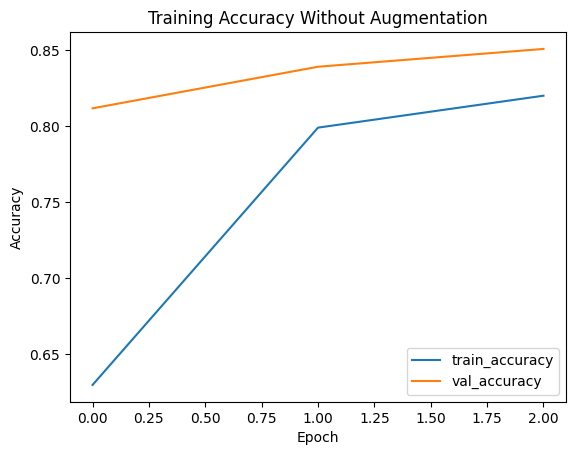

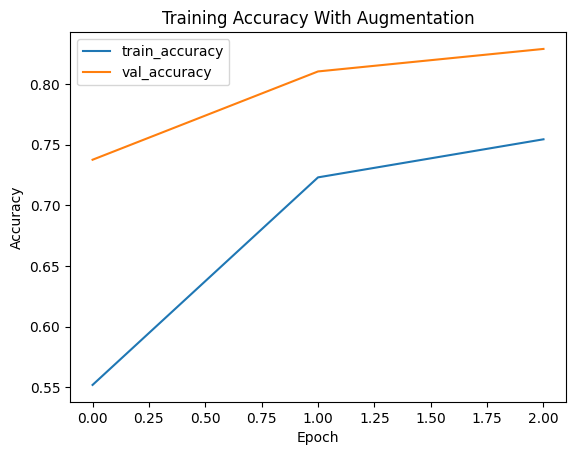

In [ ]:
#Plot training & validation accuracy to check overfitting
import matplotlib.pyplot as plt

def plot_history(hist, title):
    plt.plot(hist.history['accuracy'], label='train_accuracy')
    plt.plot(hist.history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history_no_aug, "Training Accuracy Without Augmentation")
plot_history(history_aug, "Training Accuracy With Augmentation")

| Metric                    | Without Augmentation | With Augmentation |
| ------------------------- | -------------------- | ----------------- |
| Final Training Accuracy   | 81.69%               | 75.15%            |
| Final Validation Accuracy | 85.10%               | 82.90%            |
| Test Accuracy             | **74.95%**           | **69.99%**        |
| Final Training Loss       | 0.6050               | 0.7896            |
| Final Validation Loss     | 0.5236               | 0.6222            |
| Test Loss                 | 0.7430               | 0.8686            |


**Key Observations:**

The non-augmented model achieved better accuracy and lower loss across training, validation, and test sets.

The augmented model showed slower convergence, likely due to added data variability and only 3 training epochs.

Data Augmentation typically improves generalization, but in this case, limited training time may have hindered its effectiveness.

 **Conclusion**

The model trained without augmentation performed better in this setup. However, with more epochs or further hyperparameter tuning, the augmented model could potentially outperform by reducing overfitting and improving generalization.

**Note:**
Due to GPU quota exhaustion, the model training was performed on CPU. Since training on CPU is significantly slower, only 3 epochs were run for both with and without data augmentation. This limited the ability to fine-tune extensively, but the goal of demonstrating transfer learning, augmentation impact, and overfitting behavior was achieved successfully.